# Project 7- DSCI 614 Text Mining
### Jeffery Boczkaja

## 1. Load the dataset into memory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('sentiment140.csv', encoding='ISO-8859-1', header=None)
df1.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [3]:
num_rows = df1.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")

The number of rows in the dataframe is: 1600000


In [4]:
count_rows_with_value_2 = (df1.iloc[:, 0] == 2).sum()
print(f"The number of rows with the value 2 in the first column is: {count_rows_with_value_2}")

The number of rows with the value 2 in the first column is: 0


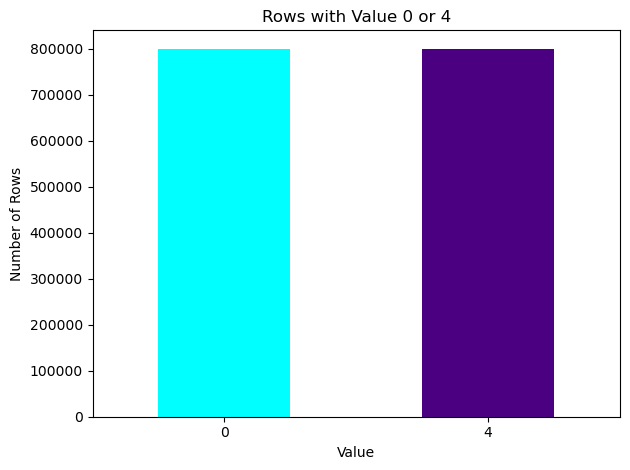

In [5]:
filtered_counts = df1[df1.iloc[:,0].isin([0,4])].iloc[:,0].value_counts()

filtered_counts.plot(kind='bar', color=['aqua', 'indigo'])
plt.title("Rows with Value 0 or 4")
plt.xlabel("Value")
plt.ylabel("Number of Rows")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
first_5000 = df1.iloc[:5000]
rows_800001_to_805001 = df1.iloc[800000:805000]
df = pd.concat([first_5000, rows_800001_to_805001], axis=0)

In [7]:
num_rows = df.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")

The number of rows in the dataframe is: 10000


In [8]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.tail()

,0,1,2,3,4,5
804995,4,1468599653,Tue Apr 07 02:39:03 PDT 2009,NO_QUERY,danalynbyers,"@lbran, thanks for sending us the package - go..."
804996,4,1468599688,Tue Apr 07 02:39:04 PDT 2009,NO_QUERY,joscelinyeo,@ickleoriental hahahha.. U obviously don't hv ...
804997,4,1468599702,Tue Apr 07 02:39:04 PDT 2009,NO_QUERY,serengetisunset,"@juliekoh It's an internet term, but it's spil..."
804998,4,1468599765,Tue Apr 07 02:39:06 PDT 2009,NO_QUERY,broombeck,new day.... NEW TRACK!!!!
804999,4,1468599793,Tue Apr 07 02:39:07 PDT 2009,NO_QUERY,aptronym,@foodieguide Okay we need to have a competitio...


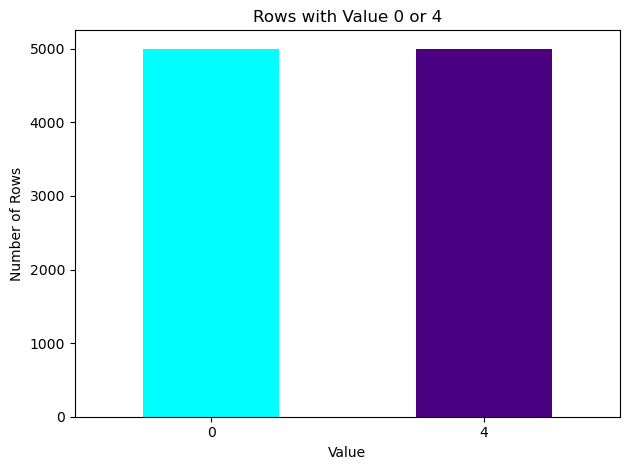

In [10]:
filtered_counts = df[df.iloc[:,0].isin([0,4])].iloc[:,0].value_counts()

filtered_counts.plot(kind='bar', color=['aqua', 'indigo'])
plt.title("Rows with Value 0 or 4")
plt.xlabel("Value")
plt.ylabel("Number of Rows")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Clean and preprocess the texts.

In [11]:
df_subset = df.iloc[:, [0, 5]]

In [12]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 804999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  int64 
 1   5       10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [13]:
num_rows = df_subset.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")

The number of rows in the dataframe is: 10000


In [14]:
percent_missing = df_subset.isnull().sum() * 100 / len(df_subset)
percent_missing

0    0.0
5    0.0
dtype: float64

In [15]:
import re
import string
import spacy

nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def clean_text(sentence):
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    text = [ word.lemma_ for word in nlp(sentence) if word not in stop_words]
    return ' '.join(text).strip().lower()

df_clean = df_subset[5].astype(str).apply(clean_text)

In [16]:
cleaned_tweets = df_subset[5].astype(str).apply(clean_text)

df_combined = pd.DataFrame({
    'sentiment': df_subset[0],
    'tweet': cleaned_tweets
})

In [17]:
df_combined.head()

,sentiment,tweet
0,0,awww that s a bummer you shoulda get david car...
1,0,be upset that he can t update his facebook by ...
2,0,i dive many time for the ball manage to save 5...
3,0,my whole body feel itchy and like its on fire
4,0,no it s not behave at all i m mad why be i her...


## 3. Graphically summarize the polarity of the tweet.

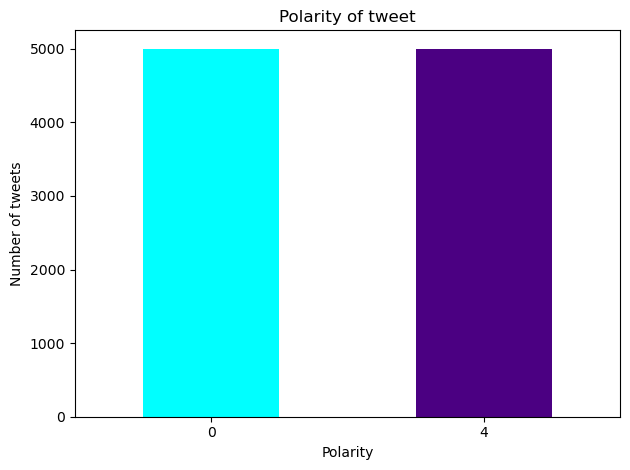

In [18]:
filtered_counts = df[df.iloc[:,0].isin([0,4])].iloc[:,0].value_counts()

filtered_counts.plot(kind='bar', color=['aqua', 'indigo'])
plt.title("Polarity of tweet")
plt.xlabel("Polarity")
plt.ylabel("Number of tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Graphically summarize the length of the text of the tweet using.

In [19]:
df = df_subset[5].str.len()
df_clean = df_clean.str.len()

In [20]:
num_rows = len(df)
print(num_rows)

10000


In [21]:
df.tail()

804995     66
804996    115
804997     85
804998     26
804999    113
Name: 5, dtype: int64

In [22]:
pd.options.display.float_format = "{:.2f}".format
df[[0, 5]].describe()

count     2.00
mean     72.00
std      60.81
min      29.00
25%      50.50
50%      72.00
75%      93.50
max     115.00
Name: 5, dtype: float64

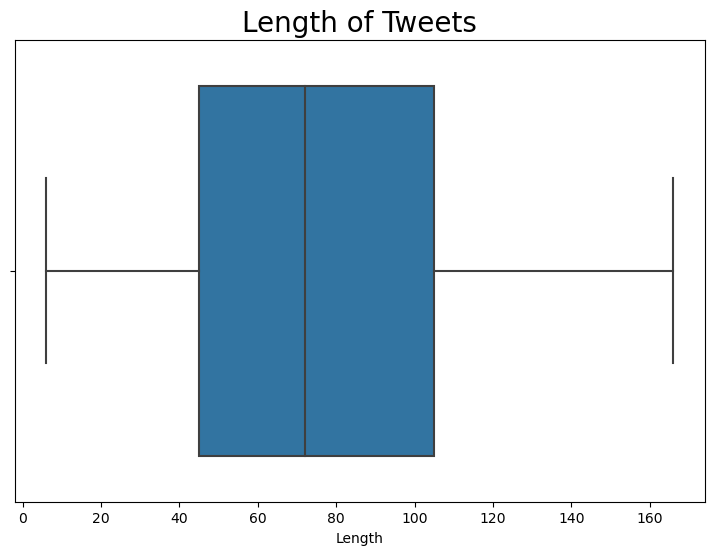

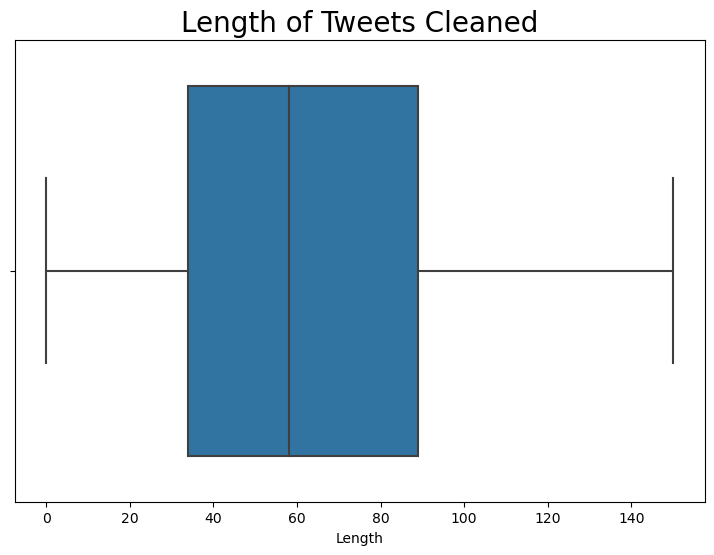

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.9, 6))
sns.boxplot(x=df, ax=ax)
ax.set_title("Length of Tweets", fontsize= 20)
ax.set_xlabel("Length")
plt.show()

fig, ax = plt.subplots(figsize=(8.9, 6))
sns.boxplot(x=df_clean, ax=ax)
ax.set_title("Length of Tweets Cleaned", fontsize= 20)
ax.set_xlabel("Length")
plt.show()

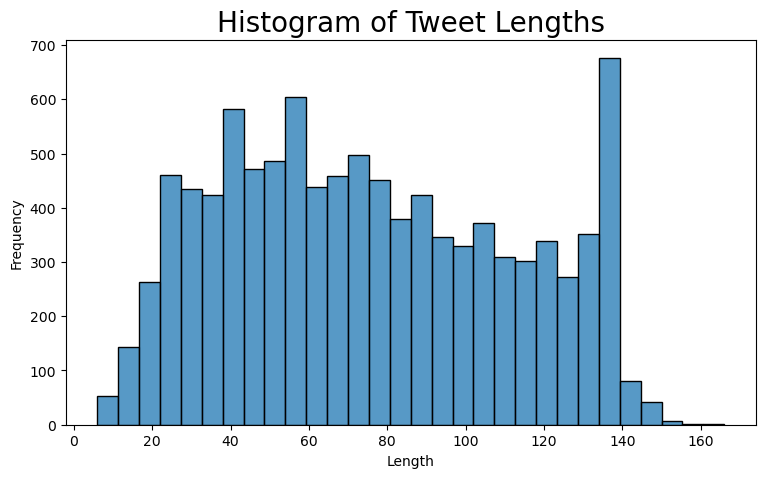

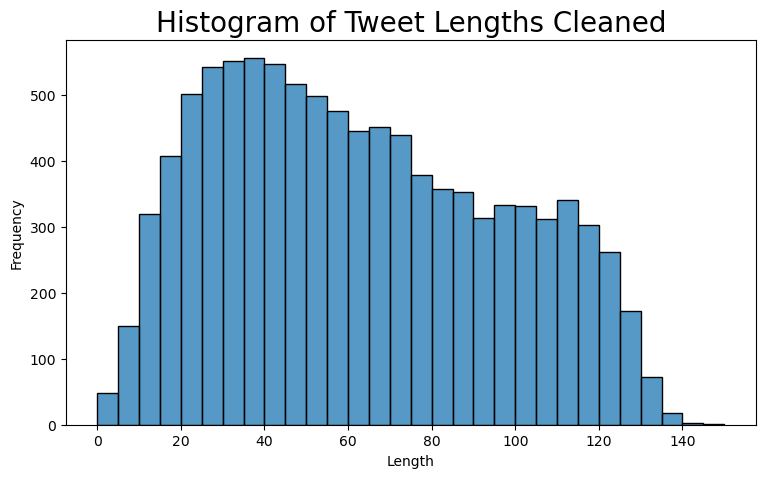

In [24]:
plt.figure(figsize=(8.9, 5))
sns.histplot(df, bins=30, kde=False)
plt.title("Histogram of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8.9, 5))
sns.histplot(df_clean, bins=30, kde=False)
plt.title("Histogram of Tweet Lengths Cleaned", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

C:\Users\whitl\AppData\Local\Temp\ipykernel_1516\347941180.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df, shade=True)


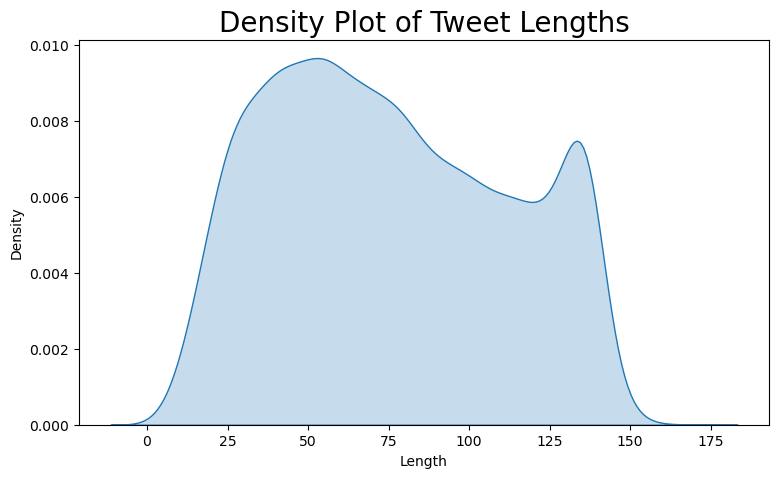

C:\Users\whitl\AppData\Local\Temp\ipykernel_1516\347941180.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean, shade=True)


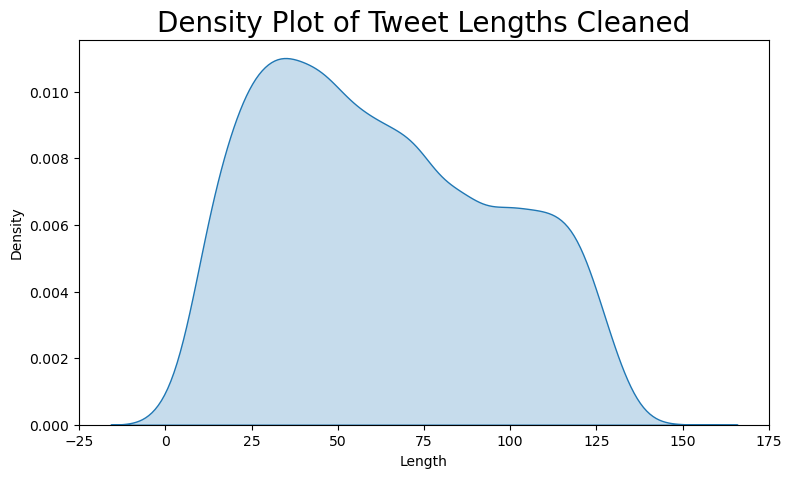

In [25]:
plt.figure(figsize=(8.9, 5))
sns.kdeplot(df, shade=True)
plt.title("Density Plot of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(8.9, 5))
sns.kdeplot(df_clean, shade=True)
plt.title("Density Plot of Tweet Lengths Cleaned", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

## 5. Graphically summarize the word count of the text of the tweet

In [26]:
import re
import string
import spacy

nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def clean_text(sentence):
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    text = [ word.lemma_ for word in nlp(sentence) if word not in stop_words]
    return ' '.join(text).strip().lower()

df_clean = df_subset[5].astype(str).apply(clean_text)

In [27]:
df = df_subset[5].str.split().str.len()
df_clean = df_clean.str.split().str.len()

In [28]:
df.tail()

804995    12
804996    18
804997    15
804998     4
804999    22
Name: 5, dtype: int64

In [29]:
pd.options.display.float_format = "{:.2f}".format
df[[0, 5]].describe()

count    2.00
mean    12.00
std      9.90
min      5.00
25%      8.50
50%     12.00
75%     15.50
max     19.00
Name: 5, dtype: float64

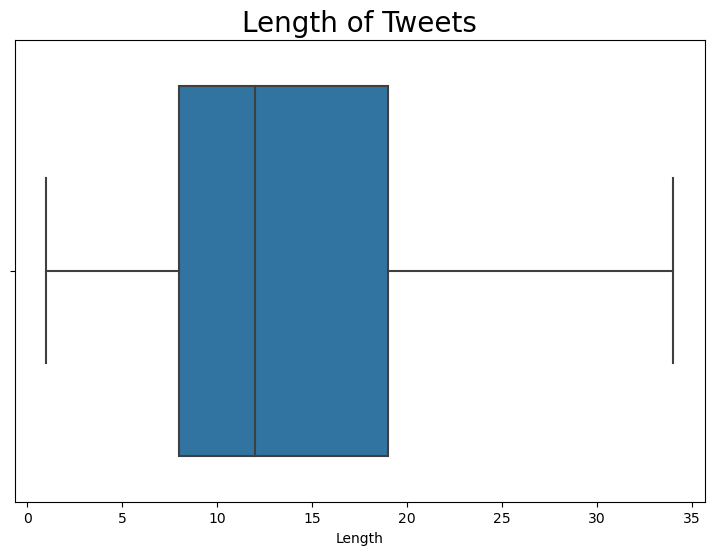

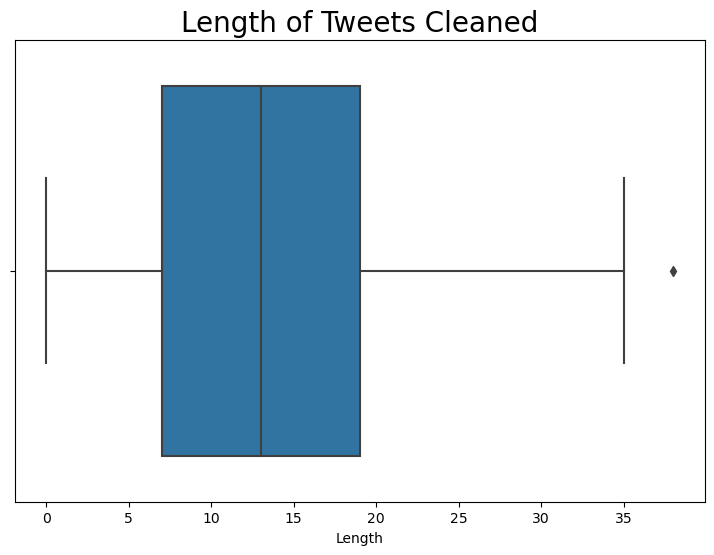

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.9, 6))
sns.boxplot(x=df, ax=ax)
ax.set_title("Length of Tweets", fontsize= 20)
ax.set_xlabel("Length")
plt.show()

fig, ax = plt.subplots(figsize=(8.9, 6))
sns.boxplot(x=df_clean, ax=ax)
ax.set_title("Length of Tweets Cleaned", fontsize= 20)
ax.set_xlabel("Length")
plt.show()

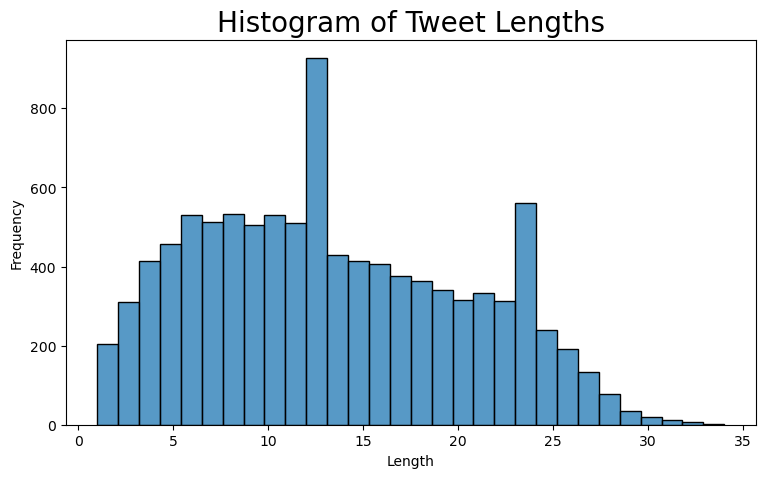

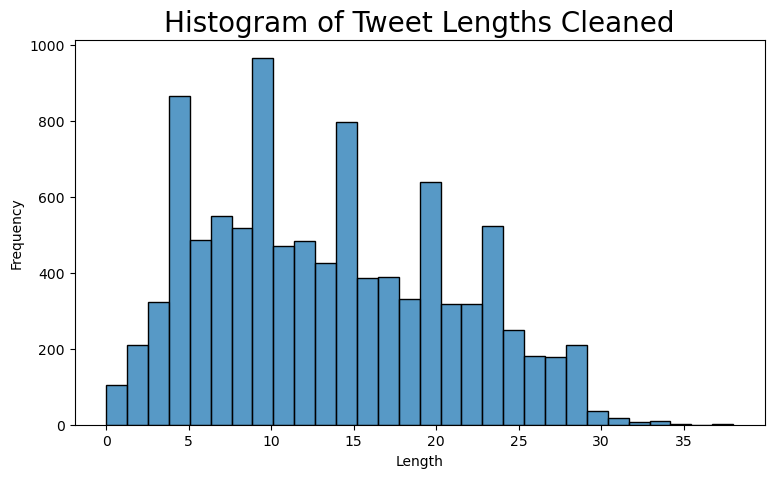

In [31]:
plt.figure(figsize=(8.9, 5))
sns.histplot(df, bins=30, kde=False)
plt.title("Histogram of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8.9, 5))
sns.histplot(df_clean, bins=30, kde=False)
plt.title("Histogram of Tweet Lengths Cleaned", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

C:\Users\whitl\AppData\Local\Temp\ipykernel_1516\3297151965.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df, shade=True)


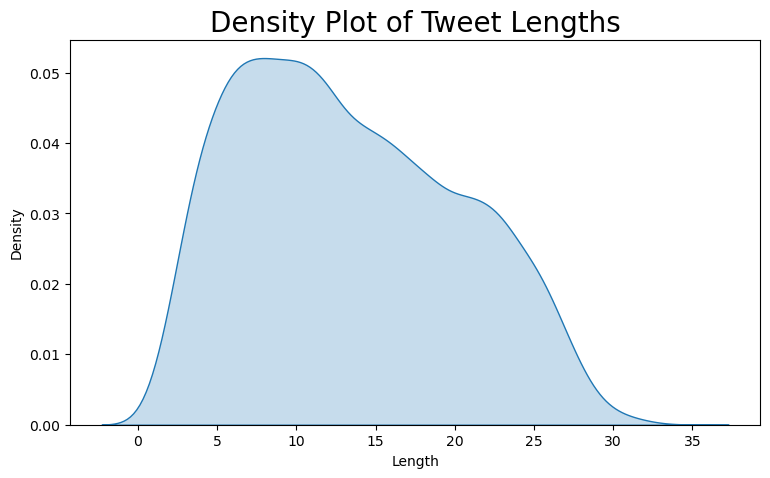

C:\Users\whitl\AppData\Local\Temp\ipykernel_1516\3297151965.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean, shade=True)


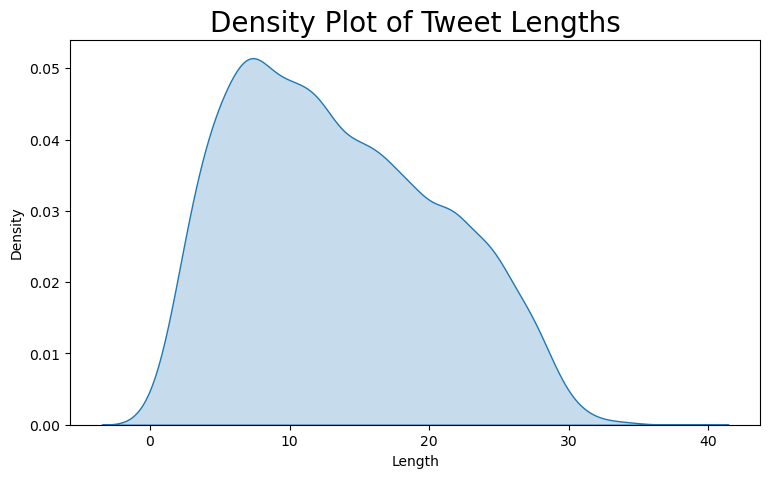

In [32]:
plt.figure(figsize=(8.9, 5))
sns.kdeplot(df, shade=True)
plt.title("Density Plot of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(8.9, 5))
sns.kdeplot(df_clean, shade=True)
plt.title("Density Plot of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

## 6. Graphically summarize the top 10 bigrams (2-gram) of the tf-idf of the text of the tweet.

In [33]:
import re
import string
import spacy

nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def clean_text(sentence):
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    text = [ word.lemma_ for word in nlp(sentence) if word not in stop_words]
    return ' '.join(text).strip().lower()

df_clean = df_subset[5].astype(str).apply(clean_text)

In [34]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_tf_idf_bigrams_series(series, use_idf=True, ngram_range=(2, 2), top_n=10):
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, use_idf=use_idf)
    
    texts = series.astype(str).tolist()
    
    tf_idf_sparse_matrix = tf_idf.fit_transform(texts)
    feature_names = tf_idf.get_feature_names_out()
    sum_tfidf = tf_idf_sparse_matrix.sum(axis=0).A1
    sorted_idx = sum_tfidf.argsort()[-top_n:][::-1]
    
    return pd.DataFrame({
        'feature': feature_names[sorted_idx],
        'tf_idf': sum_tfidf[sorted_idx]
    })

df_text_clean_bigrams = get_top_tf_idf_bigrams_series(df_clean, top_n=10)
df_text_clean_bigrams

,feature,tf_idf
0,good morning,29.25
1,feel like,18.43
2,good luck,16.22
3,good night,15.65
4,look forward,14.87
5,don know,13.81
6,sorry hear,11.28
7,look like,10.68
8,don want,10.49
9,let know,8.61


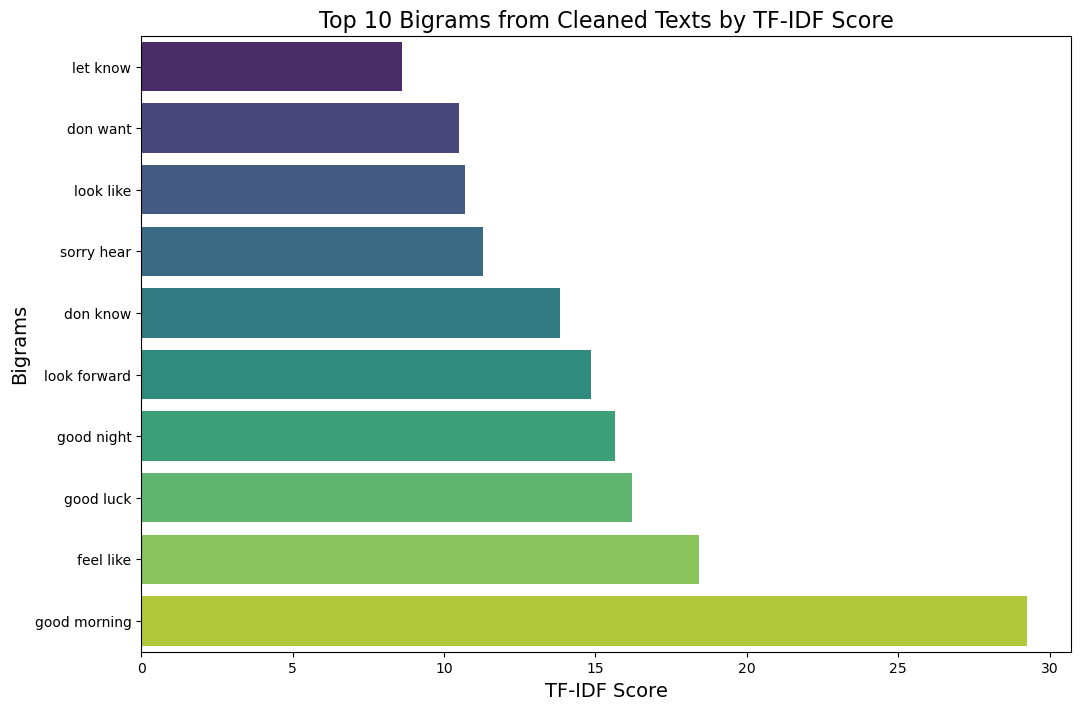

In [35]:
def get_top_tf_idf_words_series(series, use_idf=True, ngram_range=(2, 2), top_n=10):
    
    texts = series.astype(str).tolist()
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, use_idf=use_idf)
    
    tf_idf_sparse_matrix = tf_idf.fit_transform(texts)
    feature_names = np.array(tf_idf.get_feature_names_out())
    sum_tfidf = tf_idf_sparse_matrix.sum(axis=0).A1
    sorted_idx = np.argsort(sum_tfidf)[-top_n:]
    
    return pd.DataFrame({
        'feature': feature_names[sorted_idx],
        'tf_idf': sum_tfidf[sorted_idx]
    })

df_text_clean_bigrams = get_top_tf_idf_words_series(df_clean, top_n=10)

plt.figure(figsize=(12, 8))
sns.barplot(x='tf_idf', y='feature', data=df_text_clean_bigrams, palette='viridis')
plt.title('Top 10 Bigrams from Cleaned Texts by TF-IDF Score', fontsize=16)
plt.xlabel('TF-IDF Score', fontsize=14)
plt.ylabel('Bigrams', fontsize=14)
plt.show()

## 7. Visualize the top 10 term frequency of the tokens associated with negative tweets using scattertext.

In [36]:
!pip install scattertext

In [37]:
df_subset.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [38]:
df_subset = df_subset.rename(columns={0: 'sentiment', 5: 'tweet'})

In [39]:
import scattertext as st
import spacy
from pprint import pprint

nlp = spacy.load("en_core_web_sm")

corpus_bc = st.CorpusFromPandas(df_subset, 
                                category_col='sentiment', 
                                text_col='tweet',
                                nlp=nlp).build()

corpus_ac = st.CorpusFromPandas(df_combined, 
                              category_col='sentiment',
                              text_col='tweet',
                              nlp=nlp).build()

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


In [41]:
term_freq_df_bc = corpus_bc.get_term_freq_df()
term_freq_df_bc['negative Score'] = corpus_bc.get_scaled_f_scores('0')
term_freq_df_bc_freq = term_freq_df_bc.sort_values(by= '0 freq', ascending=False)
term_freq_df_bc_Score = term_freq_df_bc.sort_values(by= 'negative Score', ascending=False)

term_freq_df_ac = corpus_ac.get_term_freq_df()
term_freq_df_ac['negative Score'] = corpus_ac.get_scaled_f_scores('0')
term_freq_df_ac_freq = term_freq_df_ac.sort_values(by= '0 freq', ascending=False)
term_freq_df_ac_Score = term_freq_df_ac.sort_values(by= 'negative Score', ascending=False)

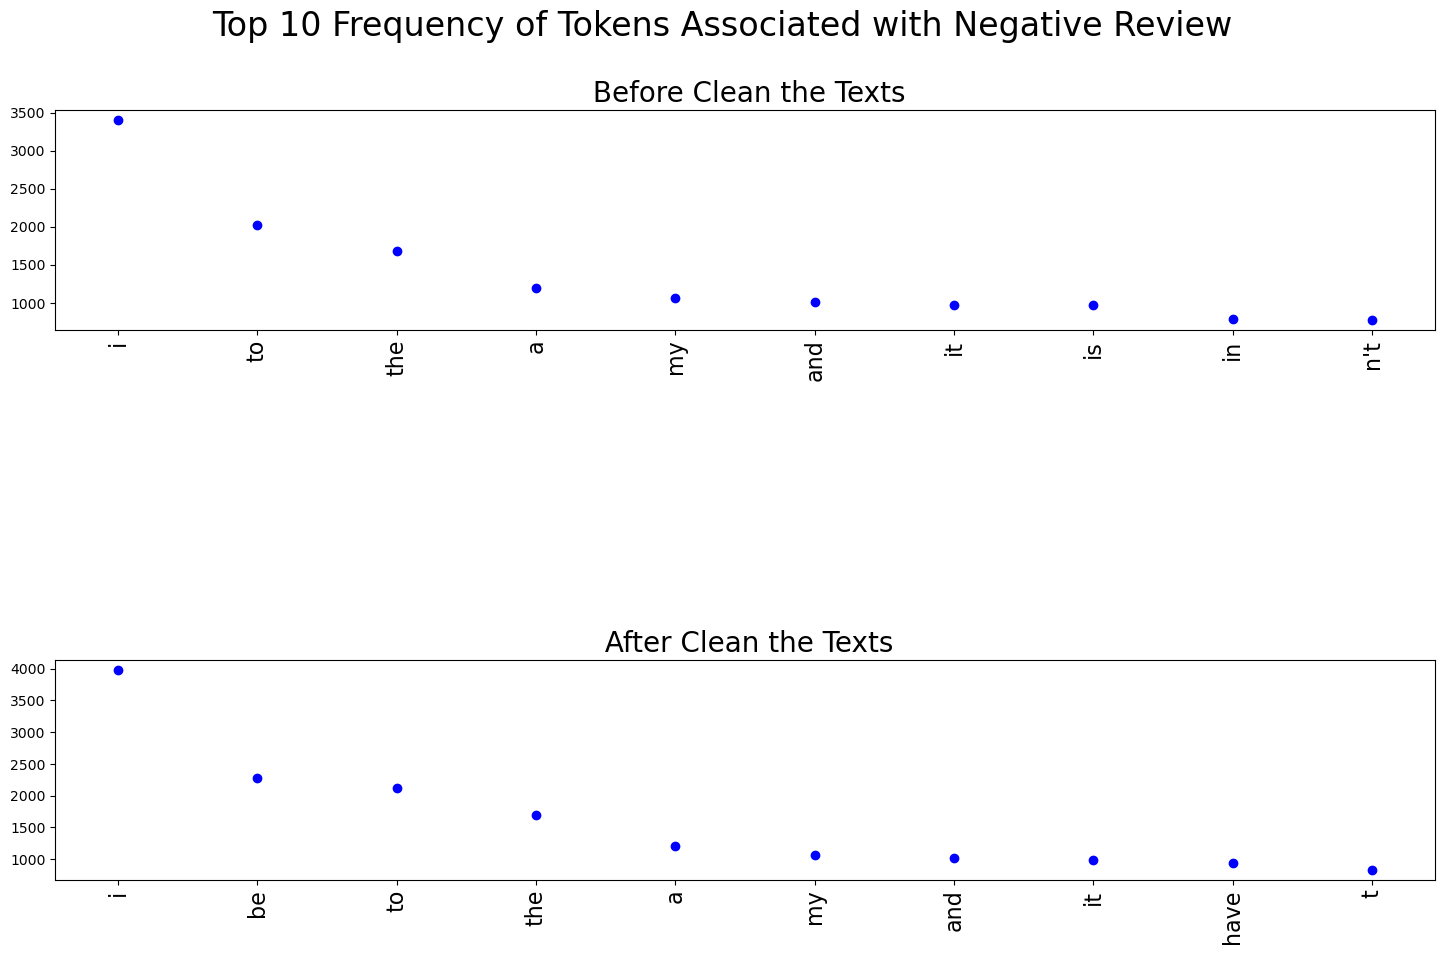

In [42]:
import matplotlib.pyplot as plt

top_n = 10
term_freq_df_ac_freq = term_freq_df_ac_freq.head(top_n)
term_freq_df_bc_freq = term_freq_df_bc_freq.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))

fig.suptitle('Top 10 Frequency of Tokens Associated with Negative Review', fontsize= 24)

ax[0].plot(x, term_freq_df_bc_freq["0 freq"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
ax[0].set_xticks(x)
x_ticks_labels = term_freq_df_bc_freq.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

ax[1].plot(x, term_freq_df_ac_freq["0 freq"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
ax[1].set_xticks(x)
x_ticks_labels = term_freq_df_ac_freq.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

fig.subplots_adjust(hspace=1.5)
plt.show()

## 8. Visualize the top 10 negative scores of the tokens associated with negative tweets using scattertext.

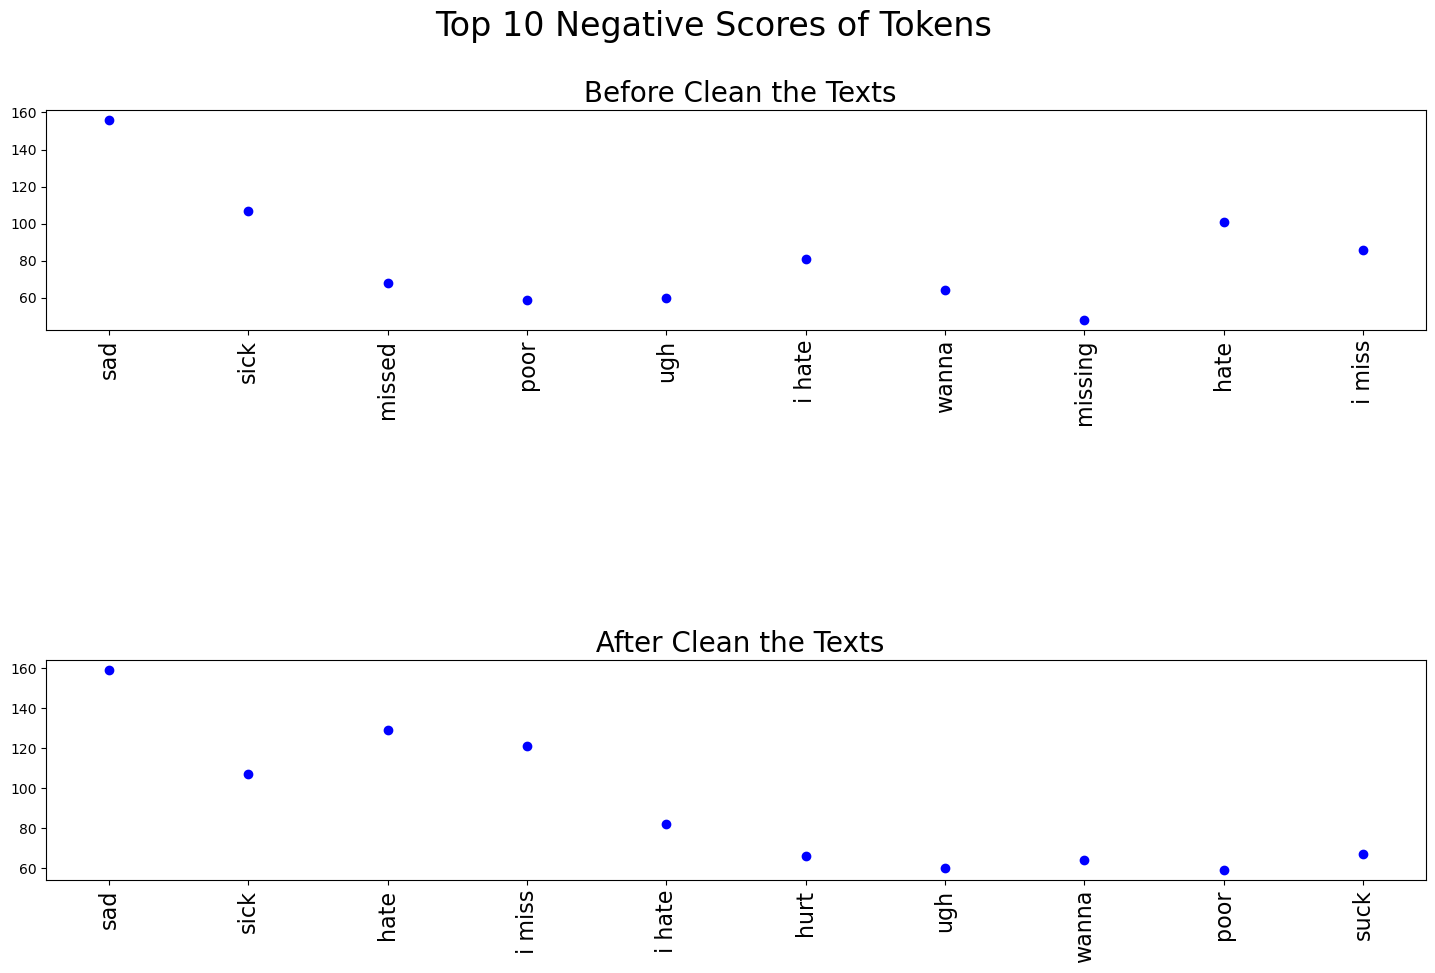

In [43]:
import matplotlib.pyplot as plt

top_n = 10
term_freq_df_ac_Score = term_freq_df_ac_Score.head(top_n)
term_freq_df_bc_Score = term_freq_df_bc_Score.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))

fig.suptitle('Top 10 Negative Scores of Tokens', fontsize= 24)

ax[0].plot(x, term_freq_df_bc_Score["0 freq"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
ax[0].set_xticks(x)
x_ticks_labels = term_freq_df_bc_Score.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

ax[1].plot(x, term_freq_df_ac_Score["0 freq"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
ax[1].set_xticks(x)
x_ticks_labels = term_freq_df_ac_Score.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

fig.subplots_adjust(hspace=1.5)
plt.show()

## 9. Visualize the first five sentences embedding for each tweet using PCA.

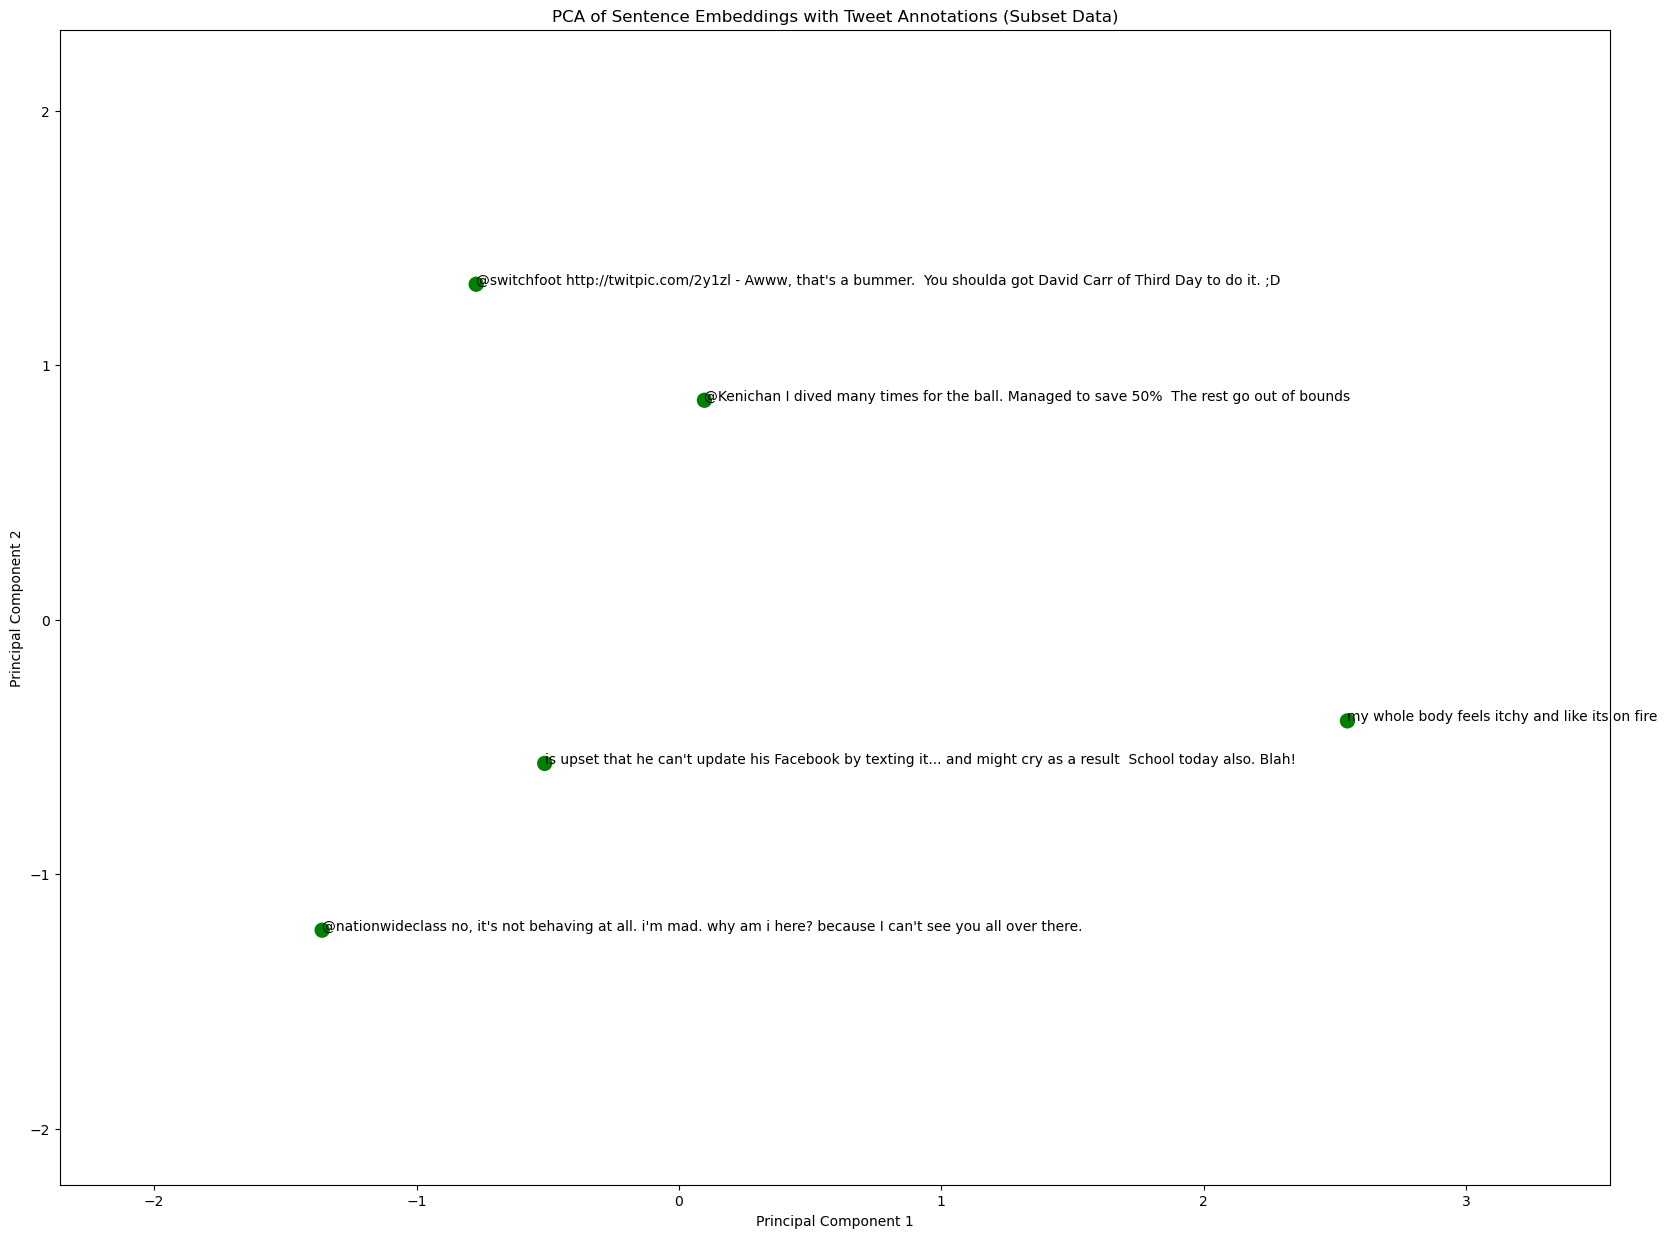

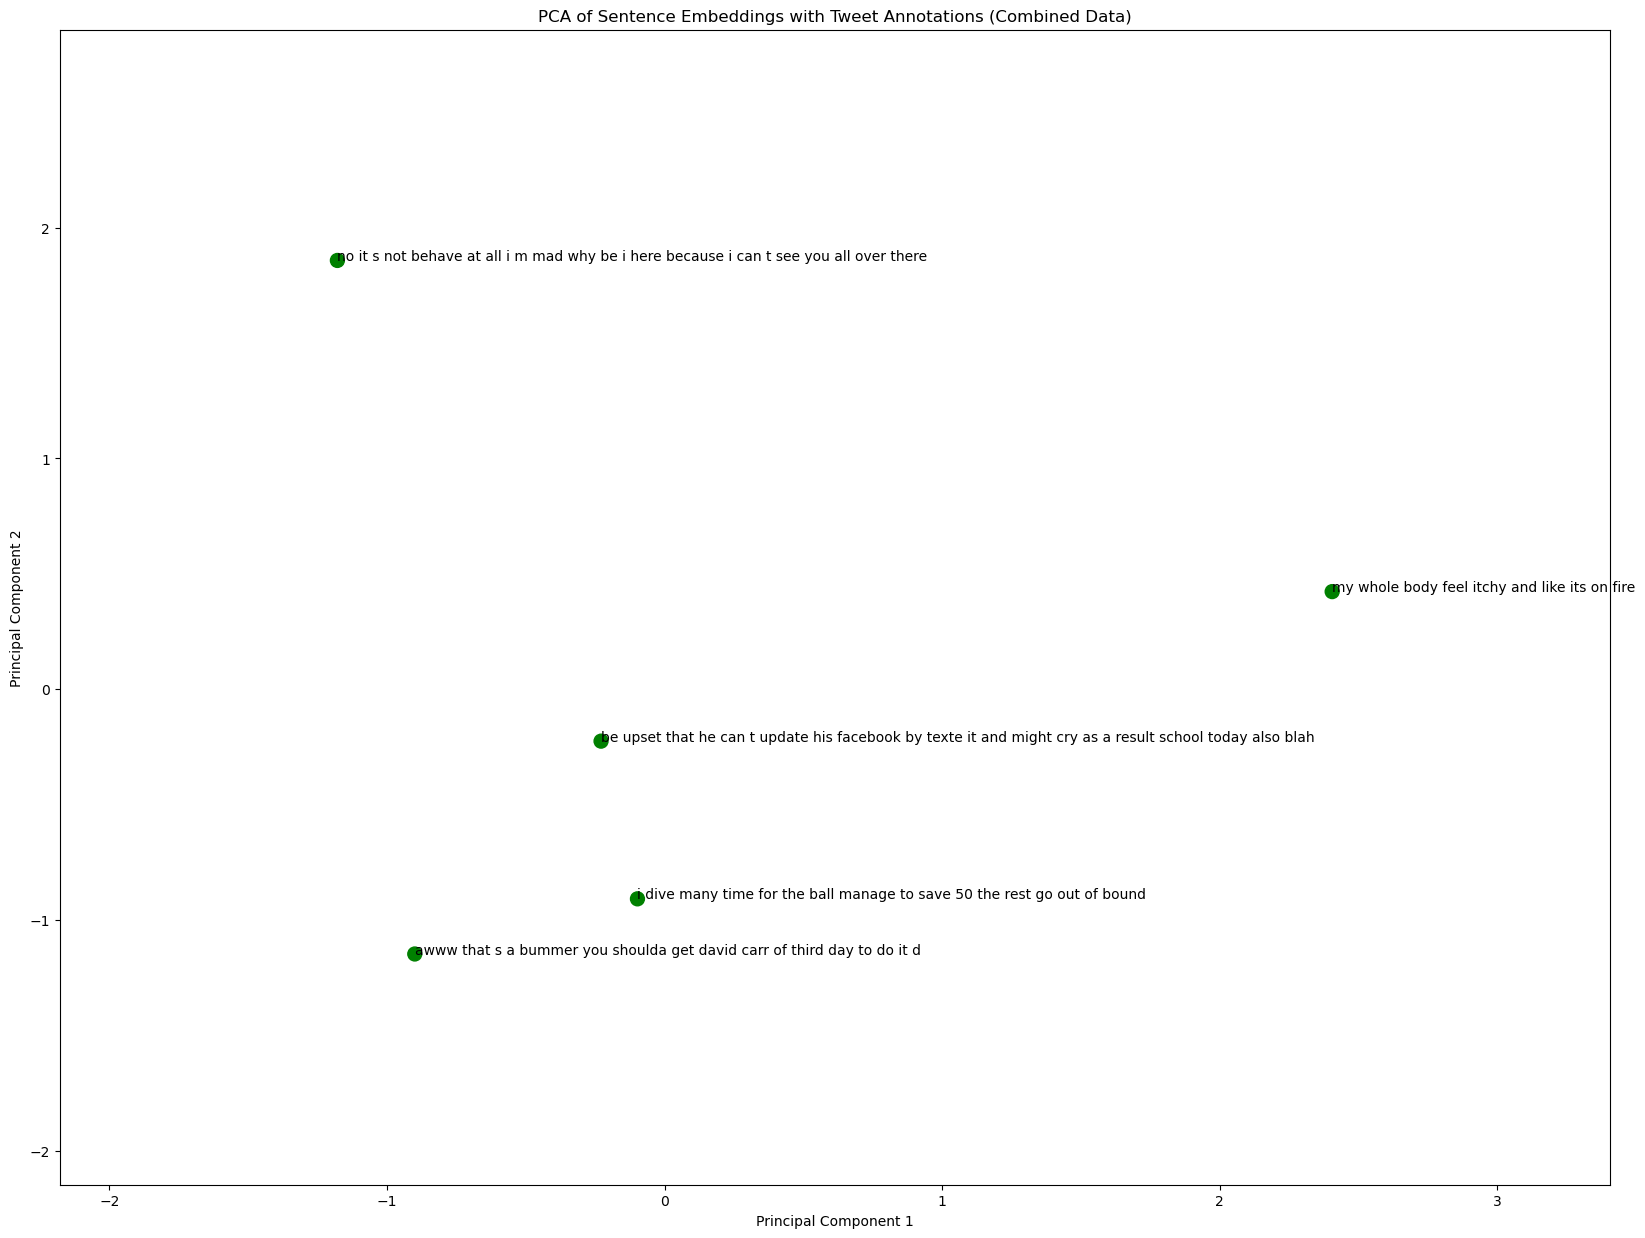

In [44]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

def plot_pca(df, title):
    embeddings = []
    tweets = []
    colors = []
    
    for _, row in df.head(5).iterrows():
        tweet = row['tweet']
        sentiment = row['sentiment']
        doc = nlp(tweet)
        embeddings.append(doc.vector)
        tweets.append(tweet)
        colors.append('red' if sentiment == '0' else 'green')
    
    embeddings = np.array(embeddings)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(20,15))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors, s=100)

    for i, tweet in enumerate(tweets):
        plt.annotate(tweet, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=10)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.xlim(reduced_embeddings[:, 0].min() - 1, reduced_embeddings[:, 0].max() + 1)
    plt.ylim(reduced_embeddings[:, 1].min() - 1, reduced_embeddings[:, 1].max() + 1)
    plt.show()

plot_pca(df_subset, "PCA of Sentence Embeddings with Tweet Annotations (Subset Data)")

plot_pca(df_combined, "PCA of Sentence Embeddings with Tweet Annotations (Combined Data)")

## 10. Visualize the first five sentences embedding for each tweet using t-SNE.

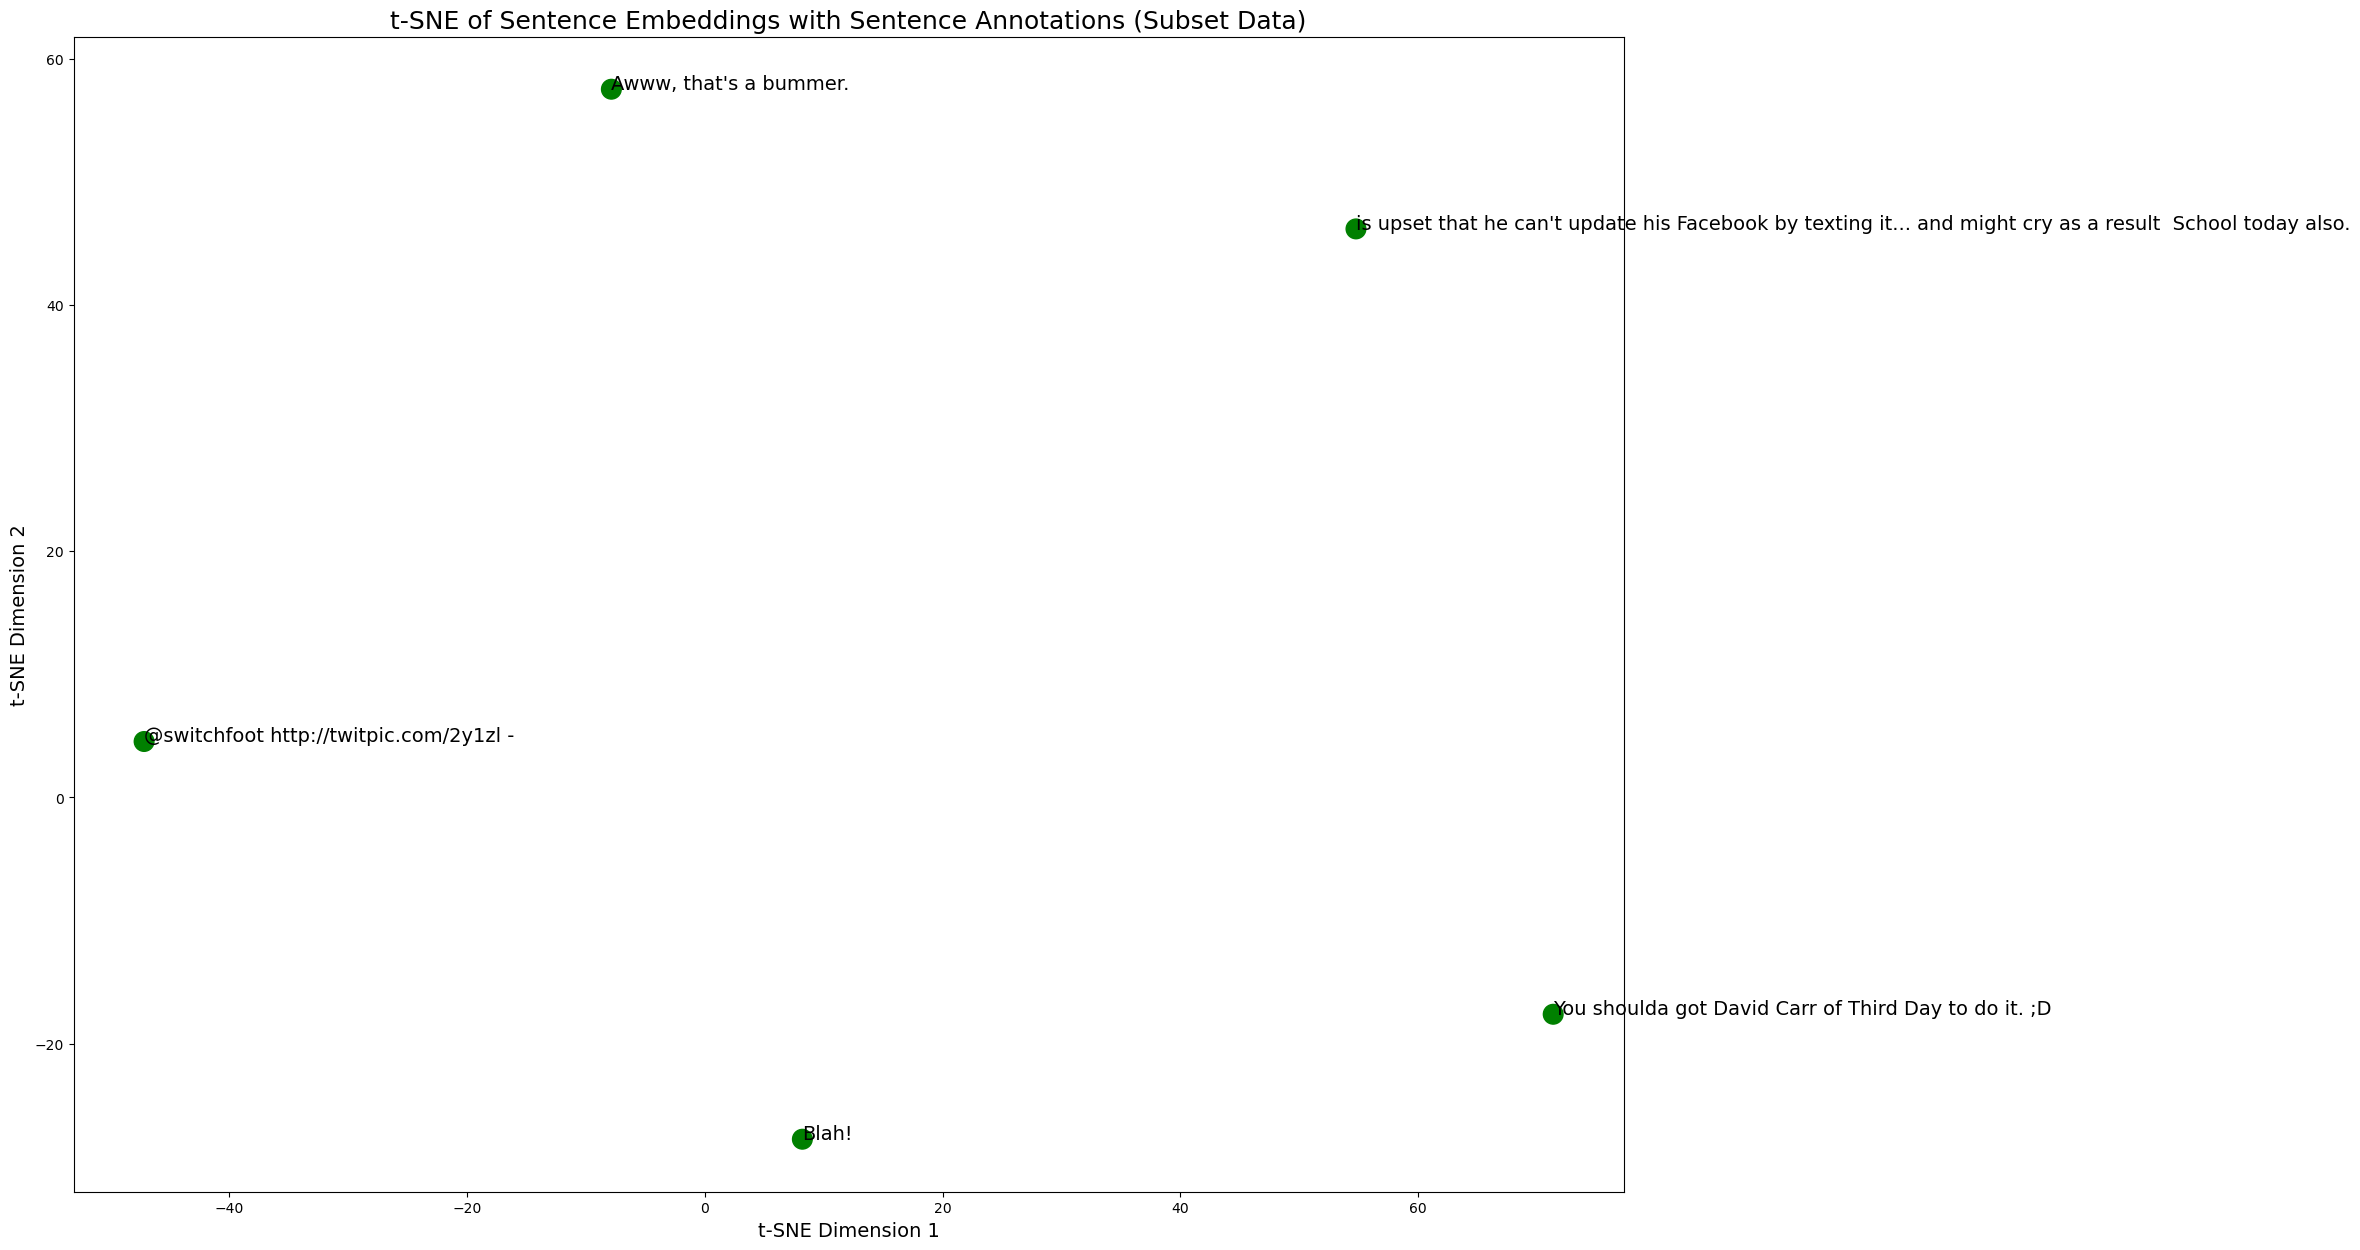

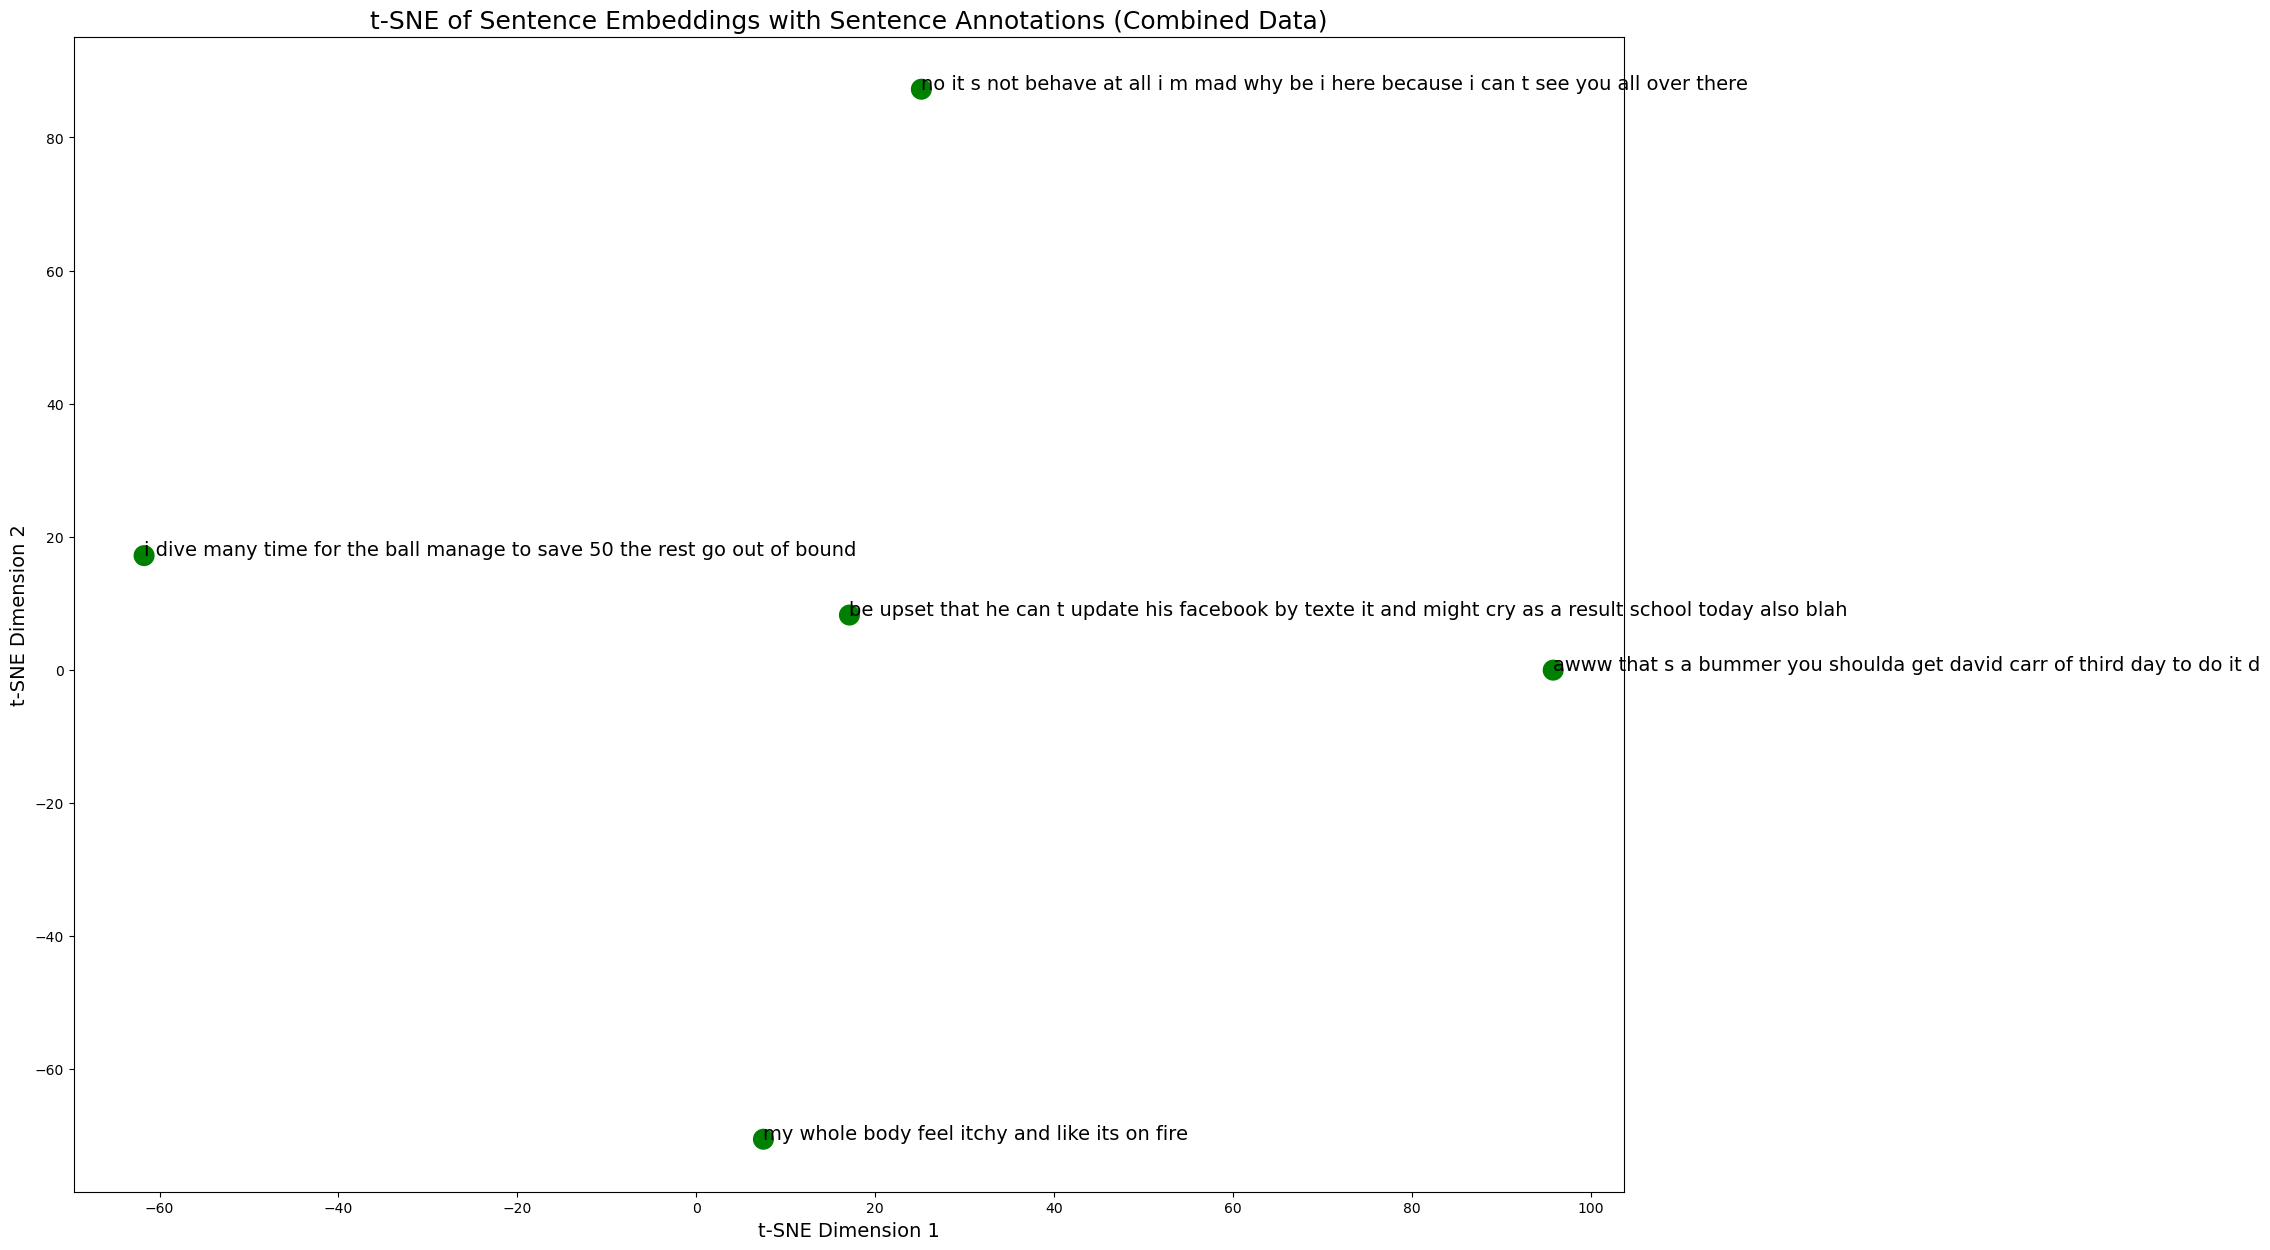

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

nlp = spacy.load("en_core_web_sm")

def plot_tsne_modified(df, title):
    embeddings = []
    sentences = []
    colors = []
    count_sentences = 0

    for _, row in df.iterrows():
        if count_sentences >= 5:
            break
        tweet = row['tweet']
        sentiment = row['sentiment']
        doc = nlp(tweet)
        for sent in doc.sents:
            if count_sentences >= 5:
                break
            embeddings.append(sent.vector)
            sentences.append(str(sent))
            colors.append('red' if sentiment == '0' else 'green')
            count_sentences += 1

    embeddings = np.array(embeddings)

    tsne = TSNE(n_components=2, random_state=0, perplexity=min(30, len(embeddings) - 1))
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(20,15))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors, s=200)

    for i, sentence in enumerate(sentences):
        plt.annotate(sentence, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=14)

    plt.xlabel("t-SNE Dimension 1", fontsize=14)
    plt.ylabel("t-SNE Dimension 2", fontsize=14)
    plt.title(title, fontsize=18)
    plt.show()

plot_tsne_modified(df_subset, "t-SNE of Sentence Embeddings with Sentence Annotations (Subset Data)")

plot_tsne_modified(df_combined, "t-SNE of Sentence Embeddings with Sentence Annotations (Combined Data)")